# Python visualization
Author = R. Patrick Xian  
Date = 09/2017
## 1. matplotlib

![Figure](https://matplotlib.org/_images/anatomy.png)

In [59]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
%matplotlib inline

### 1.1 bar chart

In [5]:
mplparams = rcParams.keys()
print(mplparams)

['_internal.classic_mode', 'agg.path.chunksize', 'animation.avconv_args', 'animation.avconv_path', 'animation.bitrate', 'animation.codec', 'animation.convert_args', 'animation.convert_path', 'animation.ffmpeg_args', 'animation.ffmpeg_path', 'animation.frame_format', 'animation.html', 'animation.mencoder_args', 'animation.mencoder_path', 'animation.writer', 'axes.autolimit_mode', 'axes.axisbelow', 'axes.edgecolor', 'axes.facecolor', 'axes.formatter.limits', 'axes.formatter.offset_threshold', 'axes.formatter.use_locale', 'axes.formatter.use_mathtext', 'axes.formatter.useoffset', 'axes.grid', 'axes.grid.axis', 'axes.grid.which', 'axes.hold', 'axes.labelcolor', 'axes.labelpad', 'axes.labelsize', 'axes.labelweight', 'axes.linewidth', 'axes.prop_cycle', 'axes.spines.bottom', 'axes.spines.left', 'axes.spines.right', 'axes.spines.top', 'axes.titlepad', 'axes.titlesize', 'axes.titleweight', 'axes.unicode_minus', 'axes.xmargin', 'axes.ymargin', 'axes3d.grid', 'backend', 'backend.qt4', 'backend.q

In [35]:
from collections import Counter
tagscounter = Counter([param.split('.')[0] for param in mplparams])
rankedtags = dict(tagscounter.most_common())
print(rankedtags)

{'boxplot': 36, 'axes': 29, 'legend': 18, 'xtick': 16, 'ytick': 16, 'figure': 15, 'lines': 15, 'animation': 13, 'keymap': 12, 'font': 11, 'savefig': 11, 'mathtext': 9, 'text': 9, 'date': 7, 'image': 7, 'patch': 5, 'path': 5, 'ps': 5, 'grid': 4, 'pdf': 4, 'pgf': 4, 'backend': 3, 'svg': 3, 'webagg': 3, 'contour': 2, 'hatch': 2, 'verbose': 2, '_internal': 1, 'agg': 1, 'axes3d': 1, 'backend_fallback': 1, 'datapath': 1, 'docstring': 1, 'errorbar': 1, 'examples': 1, 'hist': 1, 'interactive': 1, 'markers': 1, 'nbagg': 1, 'plugins': 1, 'polaraxes': 1, 'scatter': 1, 'timezone': 1, 'tk': 1, 'toolbar': 1}


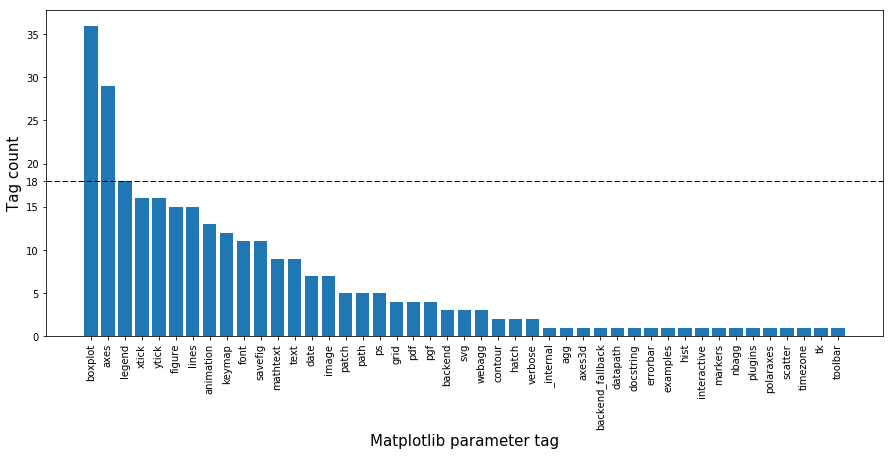

In [117]:
f, ax = plt.subplots(figsize=(15,6))
xpos = range(len(rankedtags))
ax.bar(xpos, rankedtags.values(), align='center')
ax.axhline(y=18, linestyle='--', color='k', linewidth=1)
plt.xticks(xpos, rankedtags.keys(), rotation='vertical')
ax.set_xlabel('Matplotlib parameter tag', fontsize=15)
ax.set_ylabel('Tag count', fontsize=15)
ax.set_yticks(list(range(0,36,5)) + [18]);

In [240]:
def paramsearch(strlist, keystr, condition='startswith'):
    
    if condition == 'startswith':
        return [k for k in strlist if k.startswith(keystr + '.')]
    elif condition == 'endswith':
        return [k for k in strlist if k.endswith('.' + keystr)]
    elif condition == 'contain':
        return [k for k in strlist if keystr in k]
    else:
        raise ValueError('The specified search condition is not defined!')

In [243]:
paramsearch(mplparams, 'size', condition='endswith')

['font.size',
 'xtick.major.size',
 'xtick.minor.size',
 'ytick.major.size',
 'ytick.minor.size']

In [244]:
rcParams['font.size']

10.0

### 1.2 line plot

### 1.3 image plot

### 1.4 scatter plot

### 1.5 composite plot

### _Joy Division_ || Unknown Pleasures || 1979
A half-hearted attempt at an algorithmic reproduction of the classic album cover, read also [here](https://blogs.scientificamerican.com/sa-visual/pop-culture-pulsar-origin-story-of-joy-division-s-unknown-pleasures-album-cover-video/)

In [171]:
from PIL import Image

In [228]:
%%capture
f, axs = plt.subplots(1, 2, figsize=(16,8), facecolor='w')
ax, axcov = axs
ax.set_facecolor('k')

def supergauss(x, x0, sigma, A):

    return A * np.exp(-((x-x0)/sigma)**4)

# Draw ny lines with ng Gaussians each, on an x-axis with nx points
nx, ny, ng = 1000, 60, 80
x = np.linspace(0,10,1000)

y = np.zeros((ny, nx))
for iy in range(ny):
    for ig in range(ng):
        # Select the amplitude and position of the Gaussians randomly
        x0 = 4*np.random.random() + 3
        A = 0.9*np.random.lognormal()
        sigma = 0.3
        y[iy,:] += supergauss(x, x0, sigma, A)
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ny-iy)*5
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
    ax.plot(x,y[iy]+offset, 'w', lw=1, zorder=(iy+1)*2)
    ax.fill_between(x, y[iy]+offset, offset, facecolor='k', lw=0, zorder=(iy+1)*2-1)
ax.margins(x=0.3, y=0.2)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

jd = Image.open('..//files//JoyDivision_UnknownPleasures_1979.jpg')
axcov.imshow(jd)
axcov.axes.get_xaxis().set_visible(False)
axcov.axes.get_yaxis().set_visible(False)
plt.tight_layout()

### 1.6 colors and colormaps

## 2. seaborn

In [2]:
import seaborn as sns

## 3. mayavi

In [1]:
from mayavi import mlab

## 4. interactivity
### 4.1 ipywidgets

In [263]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [255]:
def foo(x):
    print('This is number ' + str(x))
    return

In [258]:
interact(foo, x=10);

In [267]:
w_int_slider = widgets.IntSlider(min=-10, max=10, step=1, value=0, description='x')
display(w_int_slider)

### 4.2 bokeh
More examples see [here](https://github.com/bokeh/bokeh-notebooks)

### 4.3 plotly

## 5. Others
### 5.1 [ternary plot](https://github.com/marcharper/python-ternary)

In [43]:
%%capture
!pip install python-ternary

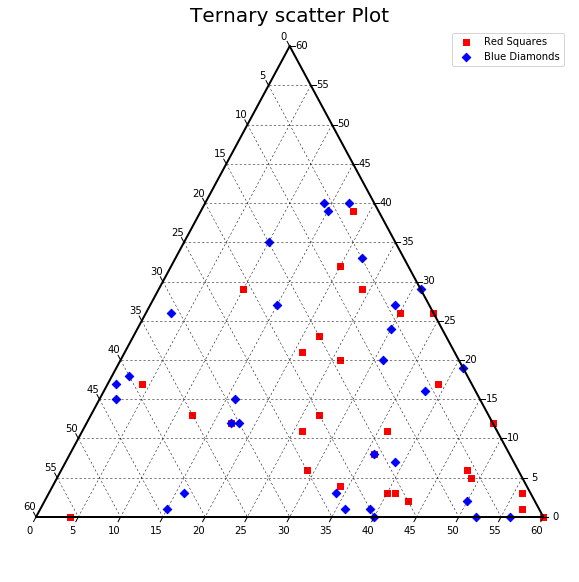

In [53]:
import random
import ternary

def random_points(num_points=25, scale=40):
    points = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points


scale = 60
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
tax.set_title("Ternary scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="k")

points = random_points(30, scale=scale)
tax.scatter(points, marker='s', color='red', label="Red Squares")
points = random_points(30, scale=scale)
tax.scatter(points, marker='D', color='blue', label="Blue Diamonds")
tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=5)
tax.clear_matplotlib_ticks()
tax.ax.axis('off');

### 5.2 Bloch sphere

In [55]:
%%capture
!pip install qutip

In [93]:
from qutip import Bloch, Bloch3d

# Generating comtypes.gen._565783C6_CB41_11D1_8B02_00600806D9B6_0_1_2
# Generating comtypes.gen._00020430_0000_0000_C000_000000000046_0_2_0
# Generating comtypes.gen.stdole


In [94]:
b3d = Bloch3d()

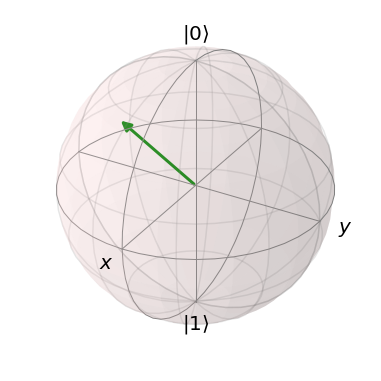

In [270]:
b = Bloch()
vec = [1,0,1]
b.add_vectors(vec)
b.show()